In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pltp 
import string
import csv

#linear and multi-linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures 


In [2]:
#read csv files
df = pd.read_csv('./kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
#1
#pre processing 
df2 = df.dropna(axis=1,inplace=False,how='any') 
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

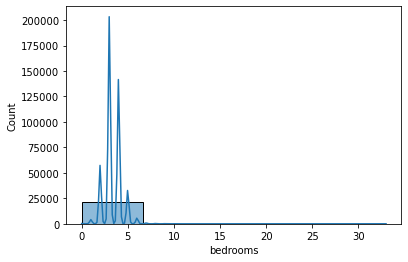

In [4]:
#visualization
"""v = sns.FacetGrid(df2,row='bedrooms')
v.map(sns.histplot,'price',bins=5)"""
sns.histplot(df2['price'],x=df['bedrooms'],bins=5,kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

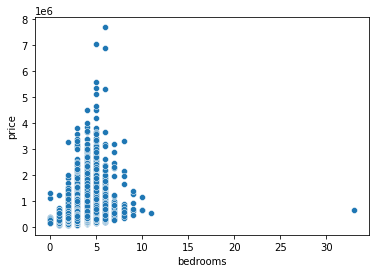

In [5]:
#2
x = df2['price']
y = df['bedrooms']
sns.scatterplot(y,x)

In [12]:
#3
#splitting data into training data and testing data
x = df2['bedrooms'].values[:,np.newaxis]
y = df2['price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [13]:
#4
#linear regression
model = LinearRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)

print("Mean squared error: ",mean_squared_error(y_test,predicted))
print("R squared: ",metrics.r2_score(y_test,predicted))

Mean squared error:  122255691856.28343
R squared:  0.10054744922737646


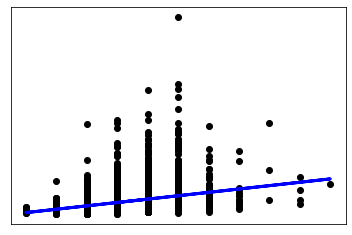

In [14]:
#5
#plotting linear regression

pltp.scatter(x_test, y_test, color="black")
pltp.plot(x_test, predicted, color="blue", linewidth=3)

pltp.xticks(())
pltp.yticks(())

pltp.show()

In [15]:
#5
#performence of LR
MSE_LR = mean_squared_error(y_test,predicted)
RS_LR = metrics.r2_score(y_test,predicted)
print("Mean squared error: ",MSE_LR)
print("R squared: ",RS_LR)

Mean squared error:  122255691856.28343
R squared:  0.10054744922737646


In [20]:
#6
#multi-linear regression
x = df2[['bedrooms','bathrooms']]
y = df2['price'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

model = LinearRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)

MSE_MLR = mean_squared_error(y_test,predicted)
RS_MLR = metrics.r2_score(y_test,predicted)
print("Mean squared error: ", MSE_MLR, " < linear regression : ", MSE_LR)
print("R squared: ",RS_MLR, " > linear regression : ", RS_LR)



Mean squared error:  99321130458.30527  < linear regression :  122255691856.28343
R squared:  0.2692802864233126  > linear regression :  0.10054744922737646


Mean squared error:  99321130458.30527  = multi-linear regression 99321130458.30527  < linear regression :  122255691856.28343
R squared:  0.2692802864233126  = multi-linear regression 0.2692802864233126  > linear regression :  122255691856.28343


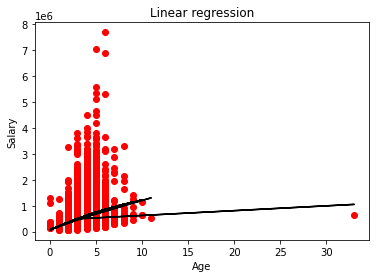

In [24]:
#7
#polynomial regression
x= df2["bedrooms"].values.reshape(-1,1)
y= df2["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

MSE_PR = mean_squared_error(y_test,predicted)
RS_PR = metrics.r2_score(y_test,predicted)

MSE_MLR = mean_squared_error(y_test,predicted)
RS_MLR = metrics.r2_score(y_test,predicted)
print("Mean squared error: ",MSE_PR, " = multi-linear regression", MSE_MLR , " < linear regression : ", MSE_LR)
print("R squared: ",RS_PR, " = multi-linear regression", RS_MLR , " > linear regression : ", MSE_LR)

pltp.scatter(x, y, color="r")
pltp.title("Linear regression")
pltp.ylabel("Salary")
pltp.xlabel("Age")
pltp.plot(x, lg.predict(poly.fit_transform(x)), color="k") 